In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
def filter_df(df):
    df = df[df['is_prompt'] == 0]
    return df

In [98]:
bi_df = filter_df(pd.read_csv('bilingual.csv'))
bi_df['group'] = 'bilingual'
mono_df = filter_df(pd.read_csv('monolingual.csv'))
mono_df['group'] = 'monolingual'
ad_df = filter_df(pd.read_csv('adult.csv'))
ad_df['group'] = 'adult'
all_df = pd.concat([bi_df, mono_df, ad_df])

group_names = ['bilingual', 'monolingual', 'adult']

In [105]:
all_df.groupby('group').size()

group
adult          2342
bilingual      3948
monolingual    4726
dtype: int64

In [128]:
a = pd.DataFrame(all_df.groupby(['group', 'segment_id', 'file']))
a['group'] = a[0].apply(lambda x: x[0])
a.groupby('group').size()

group
adult          351
bilingual      662
monolingual    887
dtype: int64

## Средняя длина ЭДЕ (в токенах)

### Со знаками препинания

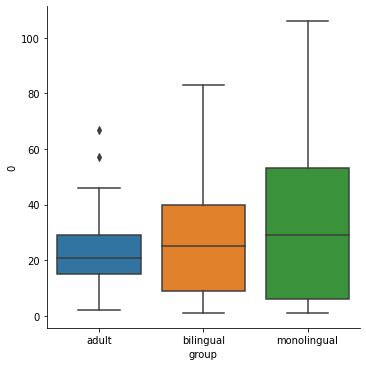

In [81]:
edu_sizes = pd.DataFrame(all_df.groupby(['group', 'segment_id']).size())
edu_sizes = edu_sizes.reset_index()

sns.catplot(x='group', y=0, data=edu_sizes, kind='box');

In [82]:
for group in group_names:
    group_df = all_df[all_df['group'] == group]
    print(f'{group}:')
    print(group_df.groupby('segment_id').size().mean())

bilingual:
25.636363636363637
monolingual:
31.71812080536913
adult:
22.304761904761904


### Без знаков препинания

In [83]:
all_df_no_punct = all_df[all_df['upos'].apply(lambda x: x not in ['PUNCT', 'X'])]

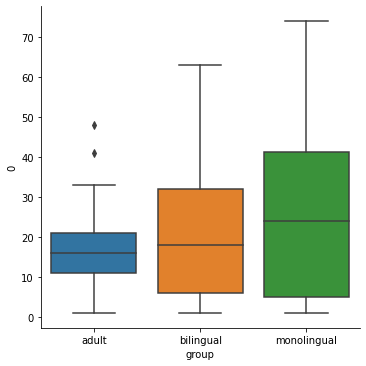

In [84]:
edu_sizes = pd.DataFrame(all_df_no_punct.groupby(['group', 'segment_id']).size())
edu_sizes = edu_sizes.reset_index()

sns.catplot(x='group', y=0, data=edu_sizes, kind='box');

In [85]:
for group in group_names:
    group_df = all_df[all_df['group'] == group]
    group_df = group_df[group_df['upos'].apply(lambda x: x not in ['PUNCT', 'X'])]
    print(f'{group}:')
    print(group_df.groupby('segment_id').size().mean())

bilingual:
20.392156862745097
monolingual:
24.97972972972973
adult:
16.419047619047618


## Среднее количество ЭДЕ на текст

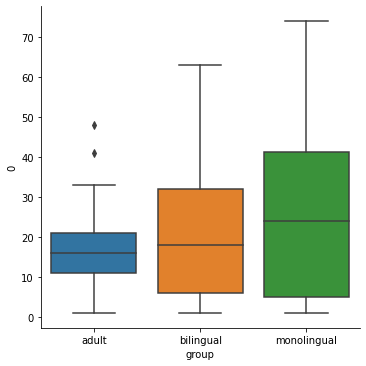

In [86]:
edu_counts = pd.DataFrame(all_df.groupby(['group', 'file']).size())
edu_counts = edu_sizes.reset_index()

sns.catplot(x='group', y=0, data=edu_counts, kind='box');

In [87]:
for group in group_names:
    group_df = all_df[all_df['group'] == group]
    print(f'{group}:')
    print(group_df.groupby('file').size().mean())

bilingual:
394.8
monolingual:
315.06666666666666
adult:
468.4


## Частотность частей речи

### На количество токенов

In [88]:
all_df['upos'].unique()

array(['PART', 'ADV', 'DET', 'NOUN', 'ADP', 'VERB', 'CCONJ', 'PRON',
       'PUNCT', 'AUX', 'SCONJ', 'PROPN', 'INTJ', 'SYM', 'X', 'NUM', 'ADJ'],
      dtype=object)

In [89]:
for pos in ['ADJ', 'CCONJ', 'SCONJ', 'PART', 'NOUN', 'VERB']:
    print(pos)
    for group in group_names:
        group_df = all_df[all_df['group'] == group]
        print(f'{group}: ',
            len(group_df[group_df['upos'] == pos]) / len(group_df) * 10**6,
              ' ipm')
    print()

ADJ
bilingual:  14944.275582573455  ipm
monolingual:  12060.939483707152  ipm
adult:  18787.361229718186  ipm

CCONJ
bilingual:  68135.76494427558  ipm
monolingual:  56707.575116377484  ipm
adult:  24338.17250213493  ipm

SCONJ
bilingual:  18237.0820668693  ipm
monolingual:  5078.290308929328  ipm
adult:  10674.63706233988  ipm

PART
bilingual:  36727.456940222895  ipm
monolingual:  23698.68810833686  ipm
adult:  45687.44662681469  ipm

NOUN
bilingual:  162107.39614994935  ipm
monolingual:  201015.65806178586  ipm
adult:  192143.46712211784  ipm

VERB
bilingual:  135258.358662614  ipm
monolingual:  173296.6567922133  ipm
adult:  162254.4833475662  ipm



### На ЭДЕ

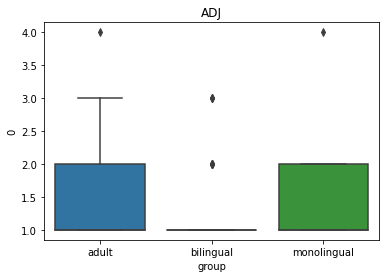

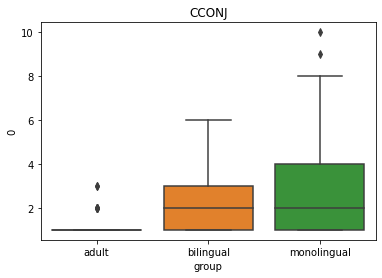

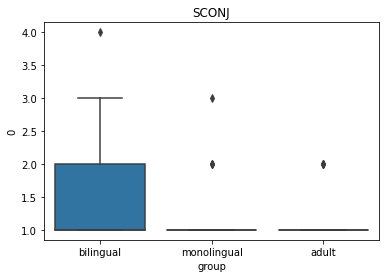

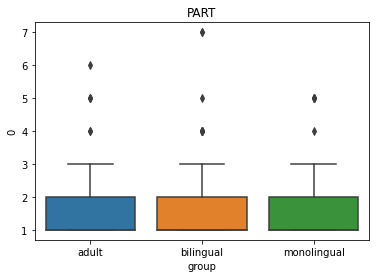

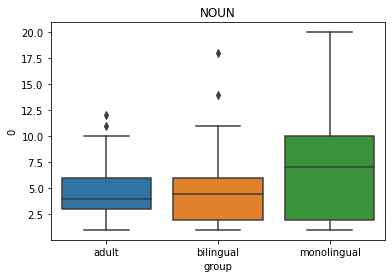

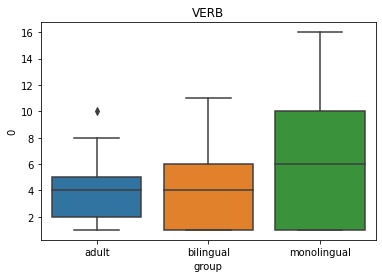

In [90]:
for pos in ['ADJ', 'CCONJ', 'SCONJ', 'PART', 'NOUN', 'VERB']:
    pos_df = pd.DataFrame(all_df[all_df['upos'] == pos].groupby(['segment_id', 'group']).size())
    pos_df = pos_df.reset_index()
    ax = sns.boxplot(x='group', y=0, data=pos_df)
    ax.set_title(f'{pos}')
    plt.show()

In [91]:
for pos in ['ADJ', 'CCONJ', 'SCONJ', 'PART', 'NOUN', 'VERB']:
    print(pos)
    for group in group_names:
        group_df = all_df[all_df['group'] == group]
        print(f"{group}: {group_df[group_df['upos'] == pos].groupby('segment_id').size().mean()}")
    print()

ADJ
bilingual: 1.2553191489361701
monolingual: 1.3571428571428572
adult: 1.4666666666666666

CCONJ
bilingual: 2.5619047619047617
monolingual: 2.9450549450549453
adult: 1.2666666666666666

SCONJ
bilingual: 1.44
monolingual: 1.263157894736842
adult: 1.1904761904761905

PART
bilingual: 1.9333333333333333
monolingual: 1.8983050847457628
adult: 1.8448275862068966

NOUN
bilingual: 4.507042253521127
monolingual: 6.934306569343065
adult: 4.455445544554456

VERB
bilingual: 4.1395348837209305
monolingual: 5.934782608695652
adult: 3.7254901960784315



## Частотность нефинитных форм

### На количество токенов

In [92]:
verb_df = all_df[all_df['upos'] == 'VERB']
for form in ['VerbForm=Fin', 'VerbForm=Inf']:
    print(form)
    for group in group_names:
        group_df = verb_df[verb_df['group'] == group]
        print(f'{group}: ',
              len(group_df[group_df['feats'].apply(lambda x: form in x)])
                         / len(group_df) * 10**6,
              ' ipm')
    print()

VerbForm=Fin
bilingual:  904494.3820224719  ipm
monolingual:  886446.8864468865  ipm
adult:  842105.2631578947  ipm

VerbForm=Inf
bilingual:  95505.61797752809  ipm
monolingual:  105006.105006105  ipm
adult:  121052.63157894737  ipm



### На ЭДЕ

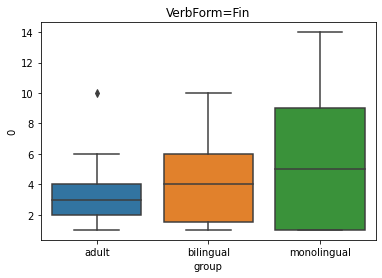

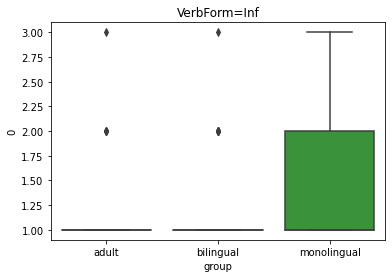

In [154]:
verb_df = all_df[all_df['upos'] == 'VERB']
for form in ['VerbForm=Fin', 'VerbForm=Inf']:
    form_df = pd.DataFrame(all_df[all_df['feats'].apply(lambda x: form in x)].groupby(['segment_id', 'group']).size())
    form_df = form_df.reset_index()
    ax = sns.boxplot(x='group', y=0, data=form_df)
    ax.set_title(f'{form}')
    plt.show()

In [155]:
for form in ['VerbForm=Fin', 'VerbForm=Inf']:
    print(form)
    for group in group_names:
        group_df = all_df[all_df['group'] == group]
        print(f"{group}: {group_df[group_df['feats'].apply(lambda x: form in x)].groupby('segment_id').size().mean()}")
    print()

VerbForm=Fin
bilingual: 3.905511811023622
monolingual: 5.343065693430657
adult: 3.196078431372549

VerbForm=Inf
bilingual: 1.2142857142857142
monolingual: 1.5925925925925926
adult: 1.15



## Чередование времен

In [95]:
for group in group_names:
    group_df = all_df[all_df['group'] == group]
    tense_changes = []
    curr_file = None
    curr_tense = None
    for i in group_df.iterrows():
        if not curr_file:
            curr_file = i[1]['file']
        else:
            pass

In [96]:
all_df

,id,word,lemma,upos,feats,head,deprel,segment_id,is_prompt,file,group
0,1,эм,эма,PART,_,6,cc,1,0,edu_df/bilingual/Ger_f_5_E.csv,bilingual
1,2,там,там,ADV,Degree=Pos,6,advmod,1,0,edu_df/bilingual/Ger_f_5_E.csv,bilingual
2,3,эта,этот,DET,Case=Nom|Gender=Fem|Number=Sing,4,det,1,0,edu_df/bilingual/Ger_f_5_E.csv,bilingual
3,4,девочка,девочка,NOUN,Animacy=Anim|Case=Nom|Gender=Fem|Number=Sing,6,nsubj,1,0,edu_df/bilingual/Ger_f_5_E.csv,bilingual
4,5,от,от,ADP,_,6,case,1,0,edu_df/bilingual/Ger_f_5_E.csv,bilingual
...,...,...,...,...,...,...,...,...,...,...,...
2769,1,В,в,ADP,_,2,case,111,0,edu_df/adult/ad_mon_4.csv,adult
2770,2,сковородку,сковородка,NOUN,Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing,3,obl,111,0,edu_df/adult/ad_mon_4.csv,adult
2771,3,высыпает,высыпать,VERB,Aspect=Imp|Mood=Ind|Number=Sing|Person=3|Tense...,0,root,111,0,edu_df/adult/ad_mon_4.csv,adult
2772,4,ягоды,ягода,NOUN,Animacy=Inan|Case=Acc|Gender=Fem|Number=Plur,3,obj,111,0,edu_df/adult/ad_mon_4.csv,adult


## Риторические отношения

In [144]:
bi_df = filter_df(pd.read_csv('bilingual_rst.csv'))
bi_df['group'] = 'bilingual'
mono_df = filter_df(pd.read_csv('monolingual_rst.csv'))
mono_df['group'] = 'monolingual'
ad_df = filter_df(pd.read_csv('adult_rst.csv'))
ad_df['group'] = 'adult'
rst_df = pd.concat([bi_df, mono_df, ad_df])

In [145]:
relnames = []
for relname in rst_df['relname'].unique():
    if isinstance(relname, str):
        print(f'relname: {relname}')
        for group in group_names:
            group_df = rst_df[rst_df['group'] == group]
            group_relname_df = rst_df[(rst_df['group'] == group) & (rst_df['relname'] == relname)]
            relname_count = len(group_relname_df.groupby(['file', 'segment_id']))
            relnames.append({'relname': relname, 'group': group})
            print(f'{group}: ',
                  relname / len(group_df.groupby(['file', 'segment_id'])))
    print()


relname: sequence
bilingual:  0.41818181818181815
monolingual:  0.36875
adult:  0.34

relname: cause
bilingual:  0.00909090909090909
monolingual:  0.016666666666666666
adult:  0.0

relname: background
bilingual:  0.007575757575757576
monolingual:  0.004166666666666667
adult:  0.017142857142857144

relname: purpose
bilingual:  0.0015151515151515152
monolingual:  0.0
adult:  0.011428571428571429

relname: result
bilingual:  0.004545454545454545
monolingual:  0.0
adult:  0.022857142857142857

relname: elaboration
bilingual:  0.025757575757575757
monolingual:  0.008333333333333333
adult:  0.05714285714285714

relname: antithesis
bilingual:  0.0015151515151515152
monolingual:  0.0
adult:  0.0

relname: joint
bilingual:  0.04090909090909091
monolingual:  0.029166666666666667
adult:  0.04285714285714286

relname: span
bilingual:  0.02878787878787879
monolingual:  0.0125
adult:  0.04285714285714286

relname: motivation
bilingual:  0.010606060606060607
monolingual:  0.0020833333333333333
adult